<h1>Sesión 3: Desarrollo del Modelo</h1>

<p> En esta sección, desarrollaremos varios modelos que predecirán el precio del automóvil utilizando las variables o características. Esto es solo una estimación, pero debería darnos una idea objetiva de cuánto debería costar el automóvil. </p>


El <b> Desarrollo de modelos </b> para ayudarnos a predecir futuras observaciones a partir de los datos que tenemos. </p>

<p> Un modelo nos ayudará a comprender la relación exacta entre diferentes variables y cómo se utilizan estas variables para predecir el resultado. </p>

<b> Importando librerias </b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
namefile ='automobileEDA.csv'
df = pd.read_csv(namefile)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h3>1. Regresion Lineal y Regresion Lineal Múltiple</h3>

<p> La regresión lineal simple es un método que nos ayuda a comprender la relación entre dos variables: </p>
<ul>
    <li> El predictor / variable independiente (X) </li>
    <li> La respuesta / variable dependiente (que queremos predecir) (Y) </li>
</ul>

<p> El resultado de la regresión lineal es una <b> función lineal </b> que predice la variable de respuesta (dependiente) en función de la variable predictora (independiente). </p>

$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$

 <b>Linear function:</b>
$$
Yhat = a + b  X
$$


<ul>
    <li> a se refiere a la <b> intersección </b> de la línea de regresión0, en otras palabras: el valor de Y cuando X es 0 </li>
    <li> b se refiere a la <b> pendiente </b> de la línea de regresión, en otras palabras: el valor con el que Y cambia cuando X aumenta en 1 unidad </li>
</ul>

Cargando la libreria para la regresión lineal

In [4]:
from sklearn.linear_model import LinearRegression

<h4>Creando el objeto de regresión lineal</h4>

In [5]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


<h4> ¿Cómo podría ayudarnos highway-mpg a predecir el precio del automóvil? </h4>


Para este ejemplo, queremos ver cómo mpg en carretera puede ayudarnos a predecir el precio del automóvil.
Mediante una regresión lineal simple, crearemos una función lineal con "highway-mpg" como variable predictiva y el "precio" como variable de respuesta.

In [6]:
X = df[['highway-mpg']]
Y = df['price']


Ajuste el modelo lineal usando highway-mpg.

In [7]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Podemos emitir una predicción

In [9]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

<h4>Valor del intercepto  (a)</h4>

In [10]:
lm.intercept_

38423.305858157386

<h4>Valor de la pendiente  (b)</h4>

In [11]:
lm.coef_

array([-821.73337832])

Modelo final : 

<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>


<div class = "alert alert-danger alertdanger" style = "margin-top: 20px">
<h1> Pregunta # 1 b): </h1>

<b> ¿Entrena un modelo usando 'engine-size' como variable independiente y 'price' como variable dependiente? </b>
</div>

<h4>Regresión Lineal Múltiple</h4>

<p> ¿Qué sucede si queremos predecir el precio del automóvil usando más de una variable? </p>

<p> Si queremos usar más variables en nuestro modelo para predecir el precio del automóvil, podemos usar <b> Regresión lineal múltiple </b>.
La regresión lineal múltiple es muy similar a la regresión lineal simple, pero este método se utiliza para explicar la relación entre una variable de respuesta continua (dependiente) y <b> dos o más </b> variables predictoras (independientes).
La mayoría de los modelos de regresión del mundo real involucran múltiples predictores. Ilustraremos la estructura usando cuatro variables predictoras, pero estos resultados pueden generalizarse a cualquier número entero: </p>

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

La ecuación esta dada por :

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<p>De la sesión anterior se puede tomar las siguientes variables predictorias para el precio:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

In [13]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]


Ajuste el modelo lineal utilizando las cuatro variables mencionadas anteriormente.

In [14]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
# El intecepto
lm.intercept_

-15806.624626329198

In [16]:
# La pendiente
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])


Como vimos anteriormente, deberíamos obtener una función lineal final con la estructura:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

¿Cuál es la función lineal que obtenemos en este ejemplo?

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


<div class = "alert alert-danger alertdanger" style = "margin-top: 20px">
<h1> Pregunta # 2 a): </h1>
Cree y entrene un modelo de Regresión lineal múltiple "lm2" donde la variable de respuesta "price", y la variable predictora es 'normalized-losses' y  'highway-mpg'.
</div>

<h3>2)  Evaluación y Visualización del Modelo</h3>

Ahora que hemos desarrollado algunos modelos, ¿cómo evaluamos nuestros modelos y cómo elegimos el mejor? Una forma de hacerlo es mediante la visualización.

In [17]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Gráficos de Regresión</h3>

<p> Cuando se trata de regresión lineal simple, una excelente manera de visualizar el ajuste de nuestro modelo es utilizando <b> gráficos de regresión </b>. </p>

<p> Este gráfico mostrará una combinación de puntos de datos dispersos (un <b> gráfico de dispersión </b>), así como la línea de <b> regresión lineal </b> ajustada que pasa por los datos. Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación, así como la dirección (correlación positiva o negativa). </p>

 Vamos a visualizar si highway-mpg es una variable predictora potenciable:

(0, 48277.63523474222)

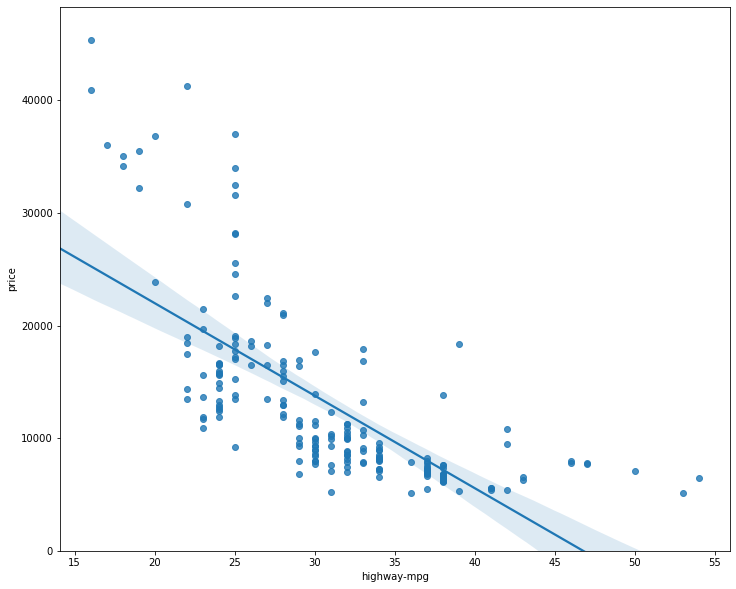

In [19]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)


<p> Podemos ver en este gráfico que el precio se correlaciona negativamente con mpg en carretera, ya que la pendiente de regresión es negativa.
Una cosa a tener en cuenta al mirar un gráfico de regresión es prestar atención a la dispersión de los puntos de datos alrededor de la línea de regresión. Esto le dará una buena indicación de la varianza de los datos, y si un modelo lineal sería el mejor ajuste o no. Si los datos están demasiado lejos de la línea, este modelo lineal podría no ser el mejor modelo para estos datos. Comparemos este gráfico con el gráfico de regresión de "peak-rpm". </p>

(0, 47422.919330307624)

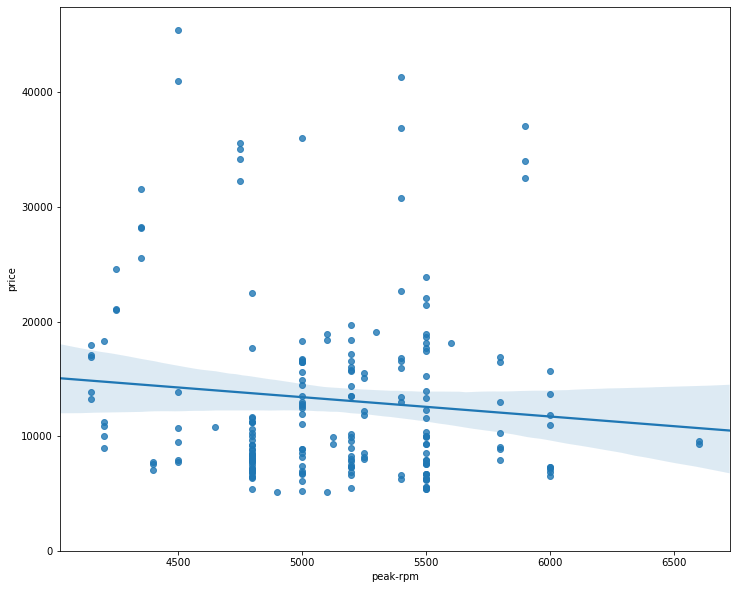

In [20]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p> Al comparar el gráfico de regresión de "peak-rpm" and "highway-mpg", vemos que los puntos para "highway-mpg" están mucho más cerca de la línea generada y, en promedio, disminuyen. Los puntos para "peak-rpm" se han extendido más alrededor de la línea pronosticada, y es mucho más difícil determinar si los puntos están disminuyendo o aumentando a medida que aumenta el "highway-mpg". </p>

<div class = "alert alert-danger alertdanger" style = "margin-top: 20px">
<h1> Pregunta # 3: </h1>
<b> Dado los gráficos de regresión anteriores, "peak-rpm" or "highway-mpg"" se correlacionan más fuertemente con "price". Use el método ".corr ()" para verificar su respuesta. </b>
</div>

<h3> Gráficos residuales </h3>

<p> Una buena forma de visualizar la varianza de los datos es usar un gráfico residual. </p>

<p> ¿Qué es un <b> residual </b>? </p>

<p> La diferencia entre el valor observado (y) y el valor predicho (Yhat) se llama residual (e). Cuando observamos un gráfico de regresión, el residual es la distancia desde el punto de datos hasta la línea de regresión ajustada. </p>

<p> Entonces, ¿qué es un <b> gráfico de residual </b>? </p>

<p> Un gráfico de residual es un gráfico que muestra los residuos en el eje vertical yy la variable independiente en el eje horizontal x. </p>

<p> ¿A qué prestamos atención cuando observamos una gráfico residual? </p>

<p> Observamos la propagación de los residuos: </p>

<p> - Si los puntos en un gráfico residual están <b> distribuidos aleatoriamente alrededor del eje x </b>, entonces un modelo lineal <b> es apropiado </b> para los datos. ¿Porqué es eso? Los residuos distribuidos aleatoriamente significan que la varianza es constante y, por lo tanto, el modelo lineal es un buen ajuste para estos datos. </p>

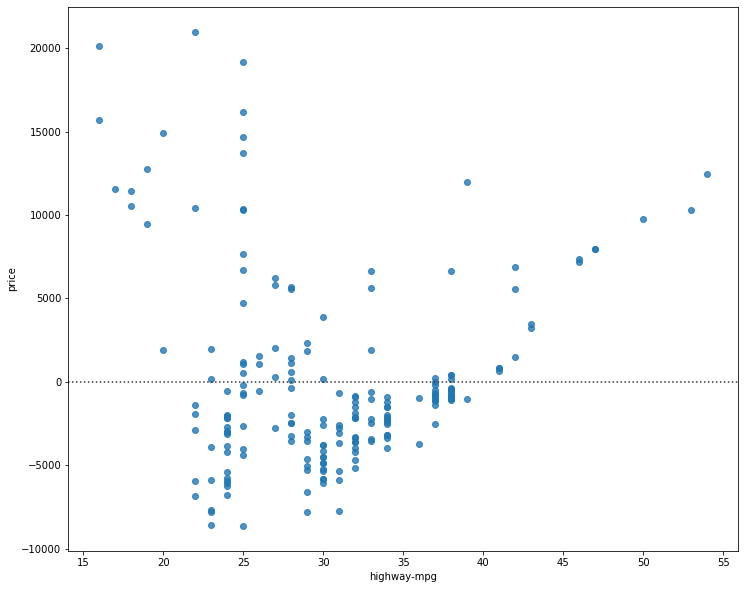

In [21]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

<i> ¿Qué nos dice esta trama? </i>

<p> Podemos ver en esta gráfica residual que los residuos no se distribuyen aleatoriamente alrededor del eje x, lo que nos lleva a creer que quizás un modelo no lineal sea más apropiado para estos datos. </p>

<h3>Modelo de Regresión Múltuple</h3>

<p> ¿Cómo visualizamos un modelo para Regresión lineal múltiple? Esto se vuelve un poco más complicado porque no se puede visualizar con regresión o gráfico residual. </p>

<p> Una forma de ver el ajuste del modelo es mirando el <b> diagrama de distribución </b>: podemos ver la distribución de los valores ajustados que resultan del modelo y compararlo con la distribución de los valores reales. </p>

Se procede a realizar una predicción : 

In [22]:
Y_hat = lm.predict(Z)

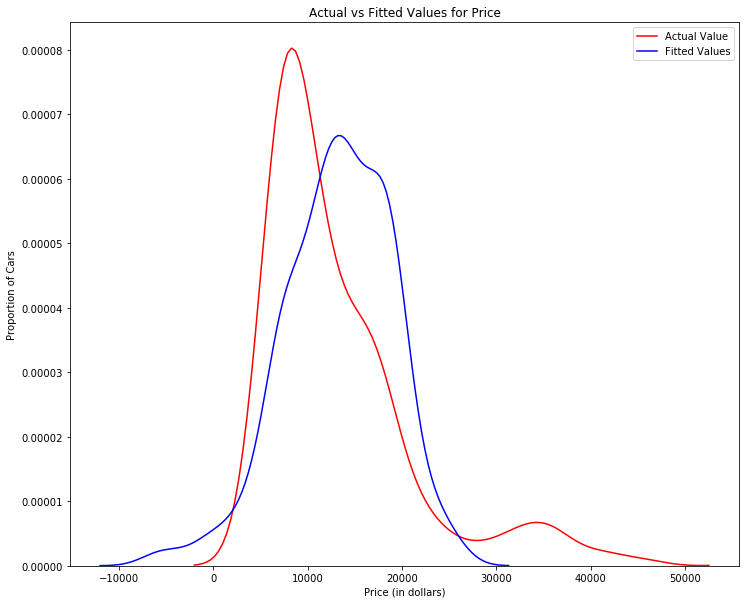

In [23]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p> Podemos ver que los valores ajustados están razonablemente cerca de los valores reales, ya que las dos distribuciones se superponen un poco. Sin embargo, definitivamente hay margen de mejora. </p>

<h2>Parte 3:  Regresión Polinomica</h2>

<p> <b> La regresión polinómica </b> es un caso particular del modelo de regresión lineal general o de los modelos de regresión lineal múltiple. </p>
<p> Obtenemos relaciones no lineales al cuadrar o establecer términos de orden superior de las variables predictoras. </p>

<p> Existen diferentes órdenes de regresión polinómica: </p>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2\\
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

In [27]:
x = df['highway-mpg']
y = df['price']

Ajustemos el polinomio usando la función <b> polyfit </b>, luego usemos la función <b> polyld </b> para mostrar la función polinomial.

In [28]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [29]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

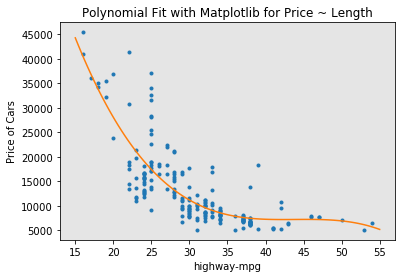

In [30]:
PlotPolly(p, x, y, 'highway-mpg')

In [31]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<div class = "alert alert-danger alertdanger" style = "margin-top: 20px">
<h1> Pregunta # 4: </h1>
<b> ¿Crear un modelo polinomial de 11 órdenes con las variables x e y de arriba? </b>
</div>


<p> La expresión analítica para la función polinomial multivariante se complica. Por ejemplo, la expresión para un polinomio de segundo orden (grado = 2) con dos variables viene dada por: </p>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [38]:
Z_pr=pr.fit_transform(Z)

In [39]:
Z.shape

(201, 4)

In [40]:
Z_pr.shape

(201, 15)

<h2>Part 4: Medidas para evaluar los modelos</h2>


<p> Al evaluar nuestros modelos, no solo queremos visualizar los resultados, sino que también queremos una medida cuantitativa para determinar la precisión del modelo. </p>

<p> Dos medidas muy importantes que a menudo se usan en estadísticas para determinar la precisión de un modelo son: </p>
<ul>
    <li> <b> R ^ 2 / R al cuadrado </b> </li>
    <li> <b> Error cuadrático medio (MSE) </b> </li>
</ul>
    
<b> R cuadrado </b>

<p> R al cuadrado, también conocido como coeficiente de determinación, es una medida para indicar qué tan cerca están los datos de la línea de regresión ajustada. </p>
    
<p> El valor de la R al cuadrado es el porcentaje de variación de la variable de respuesta (y) que se explica mediante un modelo lineal. </p>



<b> Error cuadrático medio (MSE) </b>

<p> El error cuadrático medio mide el promedio de los cuadrados de errores, es decir, la diferencia entre el valor real (y) y el valor estimado (ŷ). </p>

<h3>Model 1: Simple Linear Regression</h3>

In [41]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339175


El 49.66 % de la variacion del precio del automovil es explicado por el modelo

In [42]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [43]:
from sklearn.metrics import mean_squared_error

In [51]:
mse = mean_squared_error(df['price'], Yhat)
print('The MSE of price and predicted value is: ', mse)

The MSE of price and predicted value is:  31635042.944639895


<h3>Model 2: Multiple Linear Regression</h3>

In [52]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


EL 80.93% de la variación del precio del automovi es explicado por el modelo.

Calculamos el <b> MSE </b>

In [53]:
Y_predict_multifit = lm.predict(Z)

In [54]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>

In [55]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


In [56]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


El 67,42 % de la variacion del precio del auto es explicado por el modelo polinomial

Calculamos el <b> MSE </b>

In [58]:
mean_squared_error(df['price'], p(x))

20474146.42636125


<h2> Parte 5: Predicción y toma de decisiones </h2>
<h3> Predicción </h3>

<p> En la sección anterior, capacitamos al modelo utilizando el método <b> fit </b>. Ahora usaremos el método <b> predicción </b> para producir una predicción. Vamos a importar <b> pyplot </b> para trazar; también usaremos algunas funciones de numpy. </p>

In [59]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [60]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [61]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

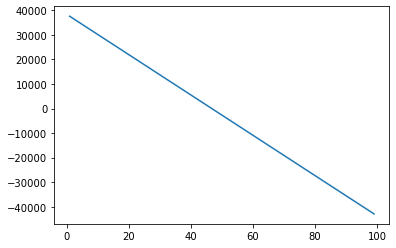

In [63]:
plt.plot(new_input, yhat)
plt.show()

In [ ]:
<h3>Decision Making: Determining a Good Model Fit</h3>


<p> Ahora que hemos visualizado los diferentes modelos y generado los valores R-cuadrado y MSE para los ajustes, ¿cómo determinamos un buen ajuste del modelo?
<ul>
    <li> <i> ¿Qué es un buen valor R cuadrado? </i> </li>
</ul>
</p>

<p> Al comparar modelos, <b> el modelo con el valor R cuadrado más alto se ajusta mejor </b> a los datos.
<ul>
    <li> <i> ¿Qué es un buen MSE? </i> </li>
</ul>
</p>

<p> Al comparar modelos, <b> el modelo con el valor MSE más pequeño se ajusta mejor </b> a los datos. </p>


<h4> Echemos un vistazo a los valores de los diferentes modelos. </h4>
<p> Regresión lineal simple: uso de Highway-mpg como variable de predicción de precio.
<ul>
    <li> R cuadrado: 0.49659118843391759 </li>
    <li> MSE: 3.16 x10 ^ 7 </li>
</ul>
</p>
    
<p> Regresión lineal múltiple: uso de caballos de fuerza, peso en vacío, tamaño del motor y mpg en carretera como variables predictoras de precio.
<ul>
    <li> R cuadrado: 0.80896354913783497 </li>
    <li> MSE: 1.2 x10 ^ 7 </li>
</ul>
</p>
    
<p> Ajuste polinómico: uso de Highway-mpg como variable de predicción de precio.
<ul>
    <li> R cuadrado: 0.6741946663906514 </li>
    <li> MSE: 2.05 x 10 ^ 7 </li>
</ul>
</p>

<h3>Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)</h3>


<p> Por lo general, cuantas más variables tenga, mejor será su modelo para predecir, pero esto no siempre es cierto. A veces puede no tener suficientes datos, puede encontrarse con problemas numéricos, o muchas de las variables pueden no ser útiles o incluso actuar como ruido. Como resultado, siempre debe verificar el MSE y R ^ 2. </p>

<p> Entonces, para poder comparar los resultados de los modelos MLR vs SLR, observamos una combinación de R-cuadrado y MSE para llegar a la mejor conclusión sobre el ajuste del modelo.
<ul>
    <li> <b> MSE </b> El MSE de SLR es 3.16x10 ^ 7 mientras que MLR tiene un MSE de 1.2 x10 ^ 7. El MSE de MLR es mucho más pequeño. </li>
    <li> <b> R-cuadrado </b>: en este caso, también podemos ver que hay una gran diferencia entre el R cuadrado de la SLR y el R cuadrado de la MLR. El R cuadrado para el SLR (~ 0.497) es muy pequeño en comparación con el R cuadrado para el MLR (~ 0.809). </li>
</ul>
</p>

Este R cuadrado en combinación con el MSE muestra que MLR parece ser el mejor modelo en este caso, en comparación con SLR.

<h3>Simple Linear Model (SLR) vs Polynomial Fit</h3>

<ul>
    <li> <b> MSE </b>: Podemos ver que Polynomial Fit derribó el MSE, ya que este MSE es más pequeño que el del SLR. </li>
    <li> <b> R al cuadrado </b>: El R al cuadrado para el Polyfit es más grande que el R al cuadrado para el SLR, por lo que el ajuste polinómico también trajo el R al cuadrado bastante. </ li >
</ul>
<p> Dado que el ajuste polinómico resultó en un MSE más bajo y un R cuadrado más alto, podemos concluir que este era un modelo de mejor ajuste que la regresión lineal simple para predecir el precio con Highway-mpg como variable predictora. </p>

<h3>Multiple Linear Regression (MLR) vs Polynomial Fit</h3>


<ul>
    <li> <b> MSE </b>: el MSE para MLR es más pequeño que el MSE para el ajuste polinómico. </li>
    <li> <b> R al cuadrado </b>: El R al cuadrado para MLR también es mucho más grande que para el ajuste polinómico. </li>
</ul>

<h2>Conclusion:</h2>

<p> Comparando estos tres modelos, concluimos que <b> el modelo MLR es el mejor modelo </b> para poder predecir el precio de nuestro conjunto de datos. Este resultado tiene sentido, ya que tenemos 27 variables en total, y sabemos que más de una de esas variables son predictores potenciales del precio final del automóvil. </p>